#############################
### File Name: Disney Movies "Gross" Prediction
### Name: Thip Rattanavilay
### Project 1
### Date: 9/24/2021
#############################

# Disney Movies "Gross" Prediction

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
disney_movies_df = pd.read_csv('./data/clean_data.csv')

In [3]:
disney_movies_df.head()

,movie_title,release_date,total_gross,inflation_adjusted_gross,release_year,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,...,genre_Musical,genre_Other,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,mpaa_rating_G,mpaa_rating_Not Rated,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R
0,Snow White and the Seven Dwarfs,1937-12-21,184925485,5228953251,1937,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,Pinocchio,1940-02-09,84300000,2188229052,1940,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Fantasia,1940-11-13,83320000,2187090808,1940,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,Song of the South,1946-11-12,65000000,1078510579,1946,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Cinderella,1950-02-15,85000000,920608730,1950,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
disney_movies_df['release_date'] = pd.to_datetime(disney_movies_df['release_date'])
disney_movies_df['release_date'] = disney_movies_df['release_date'].map(dt.datetime.toordinal)

In [5]:
disney_movies_df.shape

(575, 23)

In [6]:
# Analyzing targer variable
disney_movies_df['inflation_adjusted_gross'].describe()

count    5.750000e+02
mean     1.195887e+08
std      2.869079e+08
min      2.984000e+03
25%      2.360310e+07
50%      5.541762e+07
75%      1.195395e+08
max      5.228953e+09
Name: inflation_adjusted_gross, dtype: float64

In [7]:
X = disney_movies_df.drop(['movie_title', 'total_gross', 'inflation_adjusted_gross', 'release_date'], axis=1).reindex()
y = disney_movies_df['inflation_adjusted_gross']

In [8]:
X.head()

,release_year,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Musical,genre_Other,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,mpaa_rating_G,mpaa_rating_Not Rated,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R
0,1937,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1940,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1940,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1946,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1950,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [9]:
y.head()

0    5228953251
1    2188229052
2    2187090808
3    1078510579
4     920608730
Name: inflation_adjusted_gross, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear Regression

In [11]:
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))

lr.coef_: [-8.45002932e+06  1.01818807e+08  8.27411943e+07  2.56580750e+06
 -2.19454233e+07 -5.54481363e+07 -5.36866076e+07 -7.55319603e+06
 -1.49890758e+07  2.26675833e+07 -8.20049795e+07 -4.81507318e+07
  3.74320484e+07  3.65527103e+07  1.18872000e+08 -1.39628293e+08
  3.79678983e+07  3.23053587e+07 -4.95169640e+07]
lr.intercept_: 16965870867.160162
lr train score 0.310, lr test score: 0.237


### Linear Regression - Log Transformation

In [12]:
lr = LinearRegression().fit(X_train,y_train.apply(np.log))
y_train_pred = np.exp(lr.predict(X_train))
y_test_pred = np.exp(lr.predict(X_test))

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train.apply(np.log)),
lr.score(X_test, y_test.apply(np.log))))

lr.coef_: [-0.02846103  1.30565695  0.4142648   0.91933441  0.01409565 -0.42998284
 -2.20143176  0.01502805  0.05525476  0.11435308 -1.89188526 -0.23571639
  0.69577205  1.22525651  1.0558063  -0.41818966  0.44084965 -0.12582012
 -0.95264617]
lr.intercept_: 74.34434744919807
lr train score 0.285, lr test score: 0.209


### Support Vector Regression (SVR)

In [13]:
svr = SVR(kernel='linear', C = 300)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#standard scaler (fit transform on train, fit only on test)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train.astype(np.float))
# X_test= sc.transform(X_test.astype(np.float))

#fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

svr train score -0.081, svr test score: -0.045


### Decision Tree Regresson

In [14]:
dt = DecisionTreeRegressor(random_state=0)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#standard scaler (fit transform on train, fit only on test)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train.astype(np.float))
# X_test= sc.transform(X_test.astype(np.float))


#fit model
dt = dt.fit(X_train,y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))

dt train score 0.935, dt test score: 0.544


Overfit.

### Random Forest Regressor

In [15]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#standard scaler (fit transform on train, fit only on test)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train.astype(np.float))
# X_test= sc.transform(X_test.astype(np.float))

#fit model
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

forest train score 0.874, forest test score: 0.503


### Random Forest Parameter Grid

In [16]:
def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()

In [17]:
param_grid_rf = dict(n_estimators=[20],
                    max_depth=np.arange(1,13,2),
                    min_samples_split=[2],
                    min_samples_leaf= (1,15,2,int),
                    bootstrap=[True,False],
                    oob_score=[False])


forest = GridSearchCV(RandomForestRegressor(random_state=42), 
                      param_grid=param_grid_rf, 
                      verbose=3)


In [18]:
#fit model
forest.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; tot

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, mi

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, m

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s


/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 5/5] END bootstrap=True, max_depth=7, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=9, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=True, max_de

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 1/5] END bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=11, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=11, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 4/5] END bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=False, max_de

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 4/5] END bootstrap=False, max_depth=1, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END boot

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=False, max_de

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END boot

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 4/5] END bootstrap=False, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=9, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=9, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=9, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=9, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=9, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=False, max_de

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

[CV 3/5] END bootstrap=False, max_depth=11, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=11, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=11, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=11, min_samples_leaf=2, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=11, min_samples_leaf=2, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=11, min_samples_leaf=2, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=11, min_samples_leaf=2, min_samples_split=2, n_estimators=20, oob_score=False; total time=   0.0s
[CV 5/5] END bootstrap=False, m

/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/timrattanavilay/opt/anaco

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11]),
                         'min_samples_leaf': (1, 15, 2, <class 'int'>),
                         'min_samples_split': [2], 'n_estimators': [20],
                         'oob_score': [False]},
             verbose=3)

In [19]:
#print score
print('\n\nforest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

print_best_params(forest)



forest train score 0.753, forest test score: 0.544

*** RandomForestRegressor Best Parameters ***
bootstrap: True
ccp_alpha: 0.0
criterion: mse
max_depth: 5
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_impurity_split: None
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 20
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False



In [20]:
pred_df = pd.DataFrame(forest.predict(X_test), columns=['Pred'])
actual_df = pd.DataFrame(np.asarray(y_test), columns=['Actual'])
cm = pd.concat([actual_df, pred_df], axis=1)
cm

,Actual,Pred
0,6654819,5.011659e+07
1,5497481,7.667689e+07
2,43713554,8.331831e+07
3,234069353,1.346755e+08
4,7829877,8.331831e+07
...,...,...
185,91304495,5.428017e+07
186,36165012,8.331831e+07
187,10111144,6.461867e+07
188,21505832,6.710329e+08


/Users/timrattanavilay/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


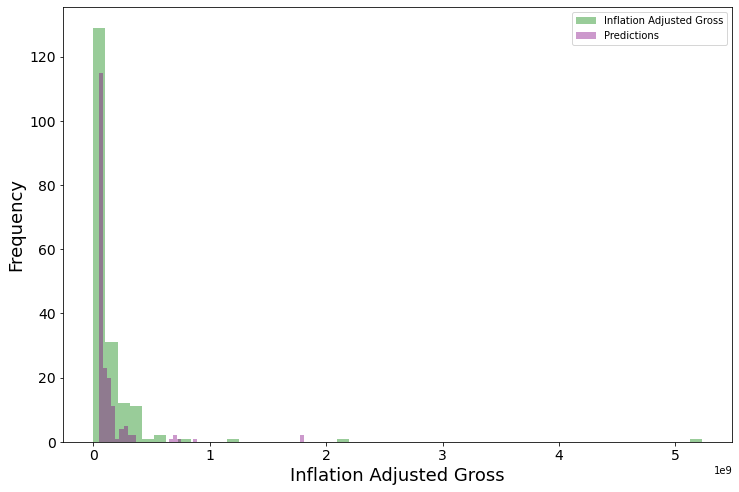

In [21]:
# Actual and Predictions distribution 
fig, ax = plt.subplots(figsize = (12, 8))
sns.distplot(cm['Actual'], color='green', kde=False, bins=50, label='Inflation Adjusted Gross')
sns.distplot(cm['Pred'], color='purple', kde=False, bins=50, label='Predictions')
plt.xlabel('Inflation Adjusted Gross', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');

<AxesSubplot:ylabel='Actual'>

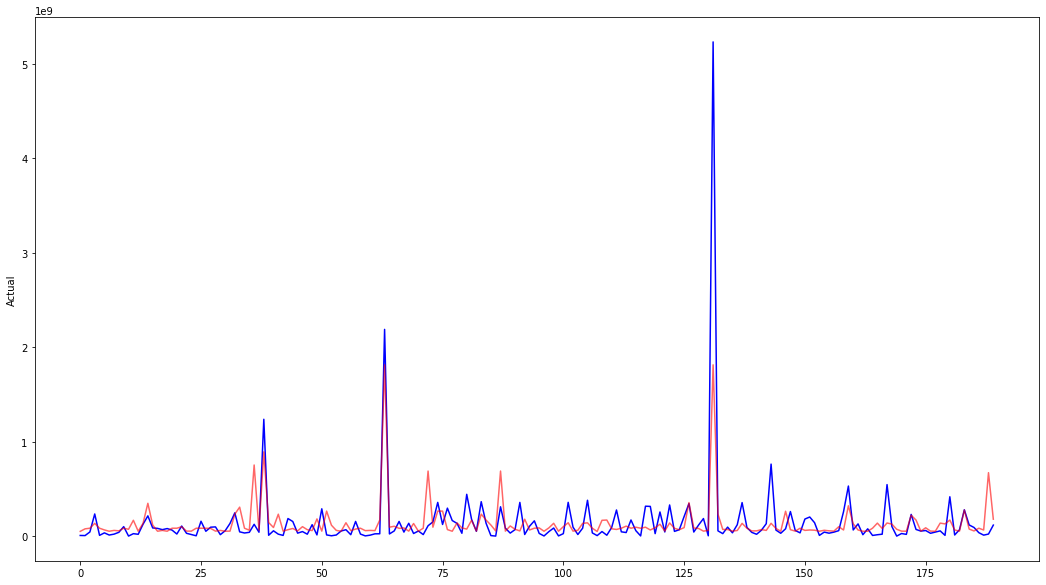

In [22]:
# Visualize actual and predicted values on test data

plt.figure(figsize=(18,10))

sns.lineplot(x = cm.index.values, y = cm.Actual, color = 'blue')
sns.lineplot(x = cm.index.values, y = cm.Pred, color = 'red', alpha = 0.6)

I tried Linear Regression, Support Vector Regression, Decision Tree, Random Forest with grid searching parameters and the best score is 75% on train and 54% on test data. This means that only ~54% of the variance in Inflation Adjusted Revenue can be explained by the current features release date, genre, and ratings. Since we have a complete dataset with all Disney movies produced so far, we need to collect more features like  
- movie characters,  
- scripts, producer,  
- director, budget($),  
- audience reviews,  
- movie length,  
- advertisement related variables etc. 

to get a better prediction score on the target variable "Inflation Adjusted Gross". 